In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
# importing datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Reading Data Set
from google.colab import drive
drive.mount("/content/gdrive")


# Importing the dataset (Link - https://drive.google.com/file/d/1GBP8p2PMLyo4KK_9CjnTF0g0pDiq85_m/view?usp=sharing)
df = pd.read_csv('/content/gdrive/MyDrive/Dissertation dataset/car_evaluation (version 1).csv', header = 0)

Mounted at /content/gdrive


In [ ]:
#df = pd.read_csv("../sample_data/car_evaluation.csv",header=0)
df.describe()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
columns = ["Buy_price","mcost","ndoors","nop","lug_boot","safety","decision"]
df.columns = columns

In [ ]:
df

,Buy_price,mcost,ndoors,nop,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.head()

,Buy_price,mcost,ndoors,nop,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.head()

X_list=["Buy_price","mcost","ndoors","nop","lug_boot","safety"]

X=df[X_list]
y=df.decision
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

# New Section

In [ ]:
df.shape #tells the number of rows and columns of a given DataFrame.

(1728, 7)

In [ ]:
X.Buy_price.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
X.mcost.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
X.ndoors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
X.nop.unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
X.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
X.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
#defining function for bar graph
def grp_brplt(col1):

    df1 = df.groupby(['decision',col1]).size().to_frame('total').reset_index()

    plt.figure(figsize=(10,8))
    ax=plt.subplot()
    ax = sns.barplot(data=df1, x=df1[col1], y=df1["total"], hue=df1["decision"])

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

    ax.set_title('Distribution of ' +col1+ ' per target variable', fontsize=20)
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='decision')
    return ax

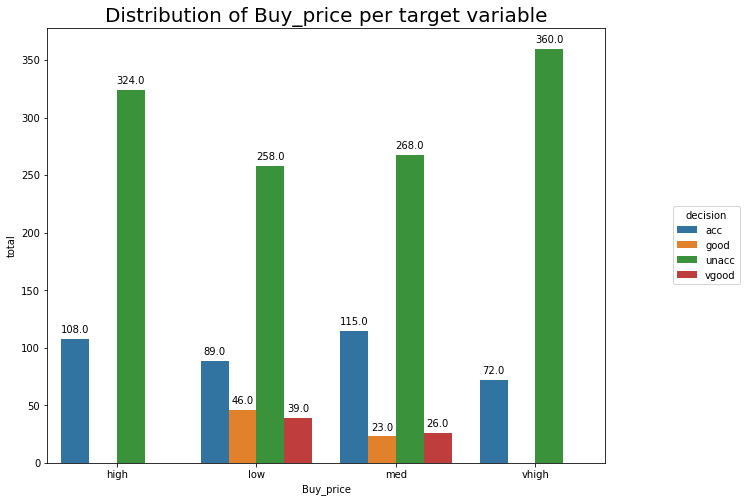

In [ ]:
grp_brplt("Buy_price")#buying price

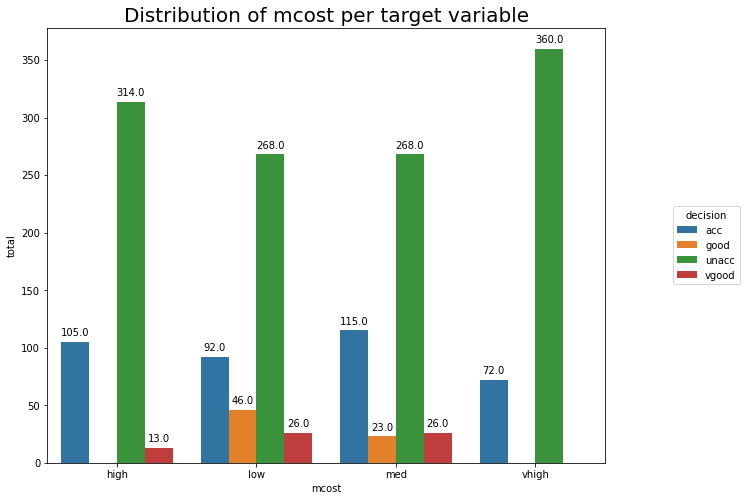

In [ ]:
grp_brplt("mcost")#maintenance cost

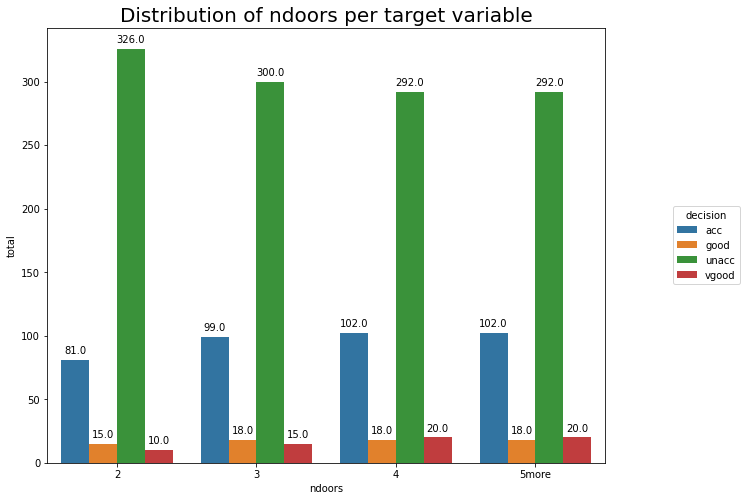

In [ ]:
grp_brplt("ndoors")#number of doors

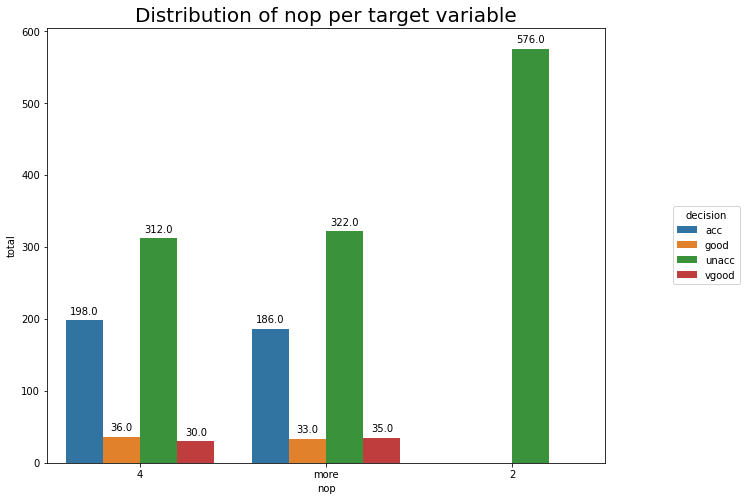

In [ ]:
grp_brplt("nop")#number of people

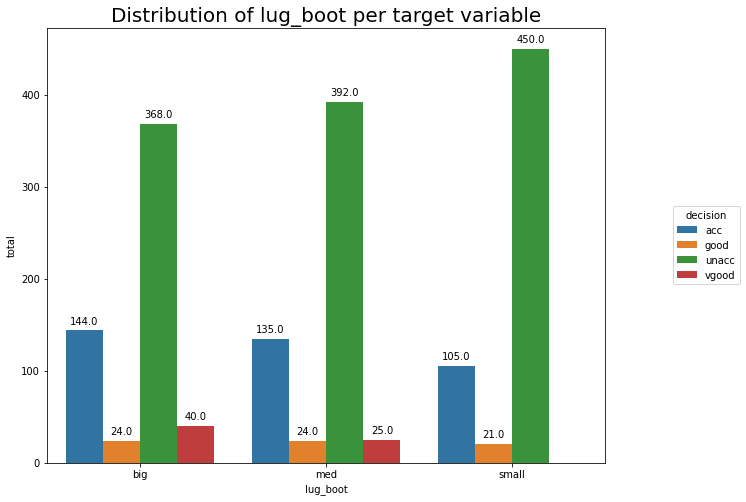

In [ ]:
grp_brplt("lug_boot")#luggage boot space

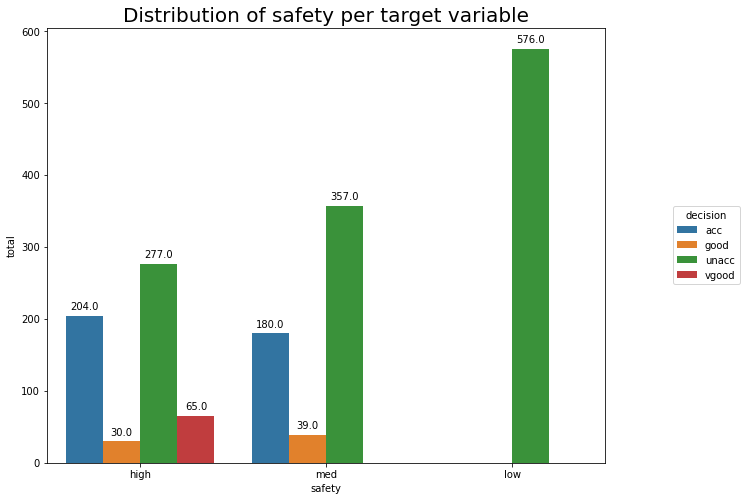

In [ ]:
grp_brplt("safety")#car safety

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.3 MB/s 


In [ ]:
# importing necessary package for encoding our categorial features
import category_encoders as ce

encoder_X = ce.OrdinalEncoder(cols=["Buy_price","mcost","ndoors","nop","lug_boot","safety"])
X= encoder_X.fit_transform(X)

encoder_Y = ce.OrdinalEncoder()
y=np.ravel(encoder_Y.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn import tree,svm,naive_bayes,neighbors,ensemble
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cl1 = naive_bayes.BernoulliNB()
cl2 = naive_bayes.GaussianNB()

In [ ]:
#decision tree

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, 12],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5]
}
dt_gs = GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid)
dt_gs.fit(X_train, y_train)
print("####### DECISION TREE #######")
print(dt_gs.best_params_)

#output
####### DECISION TREE #######
#{'criterion': 'entropy', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 2}

# random forest

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_gs = GridSearchCV(ensemble.RandomForestClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
rf_gs.fit(X_train, y_train)
print(" ####### RANDOM FOREST #######")
print(rf_gs.best_params_)

# output
 ####### RANDOM FOREST #######
# {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}

# support vector machines

param_grid2 = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear'],
              'decision_function_shape':['ovo','ovr']}
svc_gs = GridSearchCV(svm.SVC(), param_grid2, refit = True, verbose = 3)
svc_gs.fit(X_train, y_train)
print(" ####### SVM #######")
print(svc_gs.best_params_)

#output
####### SVM #######
#{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}

# knn

k_range = list(range(1, 31))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
knn_gs = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),param_grid=param_grid,cv=5,return_train_score=True) # Turn on cv train scores
knn_gs.fit(X_train, y_train)
print("####### KNN ######")
print(knn_gs.best_params_)

#output
# 6 neighbours

####### DECISION TREE #######
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 2}
Fitting 3 folds for each of 288 candidates, totalling 864 fits
 ####### RANDOM FOREST #######
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.698 total time=   0.1s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.698 total time=   0.1s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=linear;, score=0.826 total tim

In [ ]:
import pandas as pd
row_num = 0
compiler_compare = pd.DataFrame()

In [ ]:
#DECISION TREE
y_pred = dt_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'Decision Tree GS'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.9818031430934657
Confusion matrix for decision tree is : 
[[840  10   0   2]
 [  2 262   2   4]
 [  0   0  44   0]
 [  0   1   1  41]]


In [ ]:
y_pred = dt_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for decision tree is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.9267822736030829
Confusion matrix for decision tree is : 
[[359  15   0   1]
 [  9  92   0   7]
 [  0   0  16   0]
 [  0   4   2  14]]
Classification report for decision tree is : 
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       375
           2       0.83      0.85      0.84       108
           3       0.89      1.00      0.94        16
           4       0.64      0.70      0.67        20

    accuracy                           0.93       519
   macro avg       0.83      0.88      0.85       519
weighted avg       0.93      0.93      0.93       519



In [ ]:
#RANDOM FOREST
y_pred = rf_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in Random Forest is : {}".format(cas))
print("Confusion matrix for Random Forest is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'Random Forest'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in Random Forest is : 0.9884201819685691
Confusion matrix for Random Forest is : 
[[830   0   0   0]
 [ 10 271   0   0]
 [  0   1  47   0]
 [  2   1   0  47]]


In [ ]:
y_pred = rf_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Random Forest is : {}".format(cas))
print("Confusion matrix for Random Forest is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for Random Forest is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in Random Forest is : 0.9595375722543352
Confusion matrix for Random Forest is : 
[[356   3   0   0]
 [ 12 104   0   1]
 [  0   1  18   1]
 [  0   3   0  20]]
Classification report for Random Forest is : 
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       359
           2       0.94      0.89      0.91       117
           3       1.00      0.90      0.95        20
           4       0.91      0.87      0.89        23

    accuracy                           0.96       519
   macro avg       0.95      0.91      0.93       519
weighted avg       0.96      0.96      0.96       519



In [ ]:
#Support Vector Machine
y_pred = svc_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'SVM'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in SVM is : 0.9991728701406121
Confusion matrix for SVM is : 
[[841   0   0   0]
 [  1 273   0   0]
 [  0   0  47   0]
 [  0   0   0  47]]


In [ ]:
y_pred = svc_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for SVM is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in SVM is : 0.9691714836223507
Confusion matrix for SVM is : 
[[362   6   0   0]
 [  6 103   0   2]
 [  0   0  18   0]
 [  0   2   0  20]]
Classification report for SVM is : 
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       368
           2       0.93      0.93      0.93       111
           3       1.00      1.00      1.00        18
           4       0.91      0.91      0.91        22

    accuracy                           0.97       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.97      0.97      0.97       519



In [ ]:
#K-Nearest Neighbours
y_pred = knn_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in KNN is : {}".format(cas))
print("Confusion matrix for KNN is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'KNN'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in KNN is : 0.9611248966087675
Confusion matrix for KNN is : 
[[839  16   0   3]
 [  2 257   9  14]
 [  0   0  37   1]
 [  1   0   1  29]]


In [ ]:
y_pred = knn_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in KNN is : {}".format(cas))
print("Confusion matrix for KNN is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for KNN is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in KNN is : 0.9190751445086706
Confusion matrix for KNN is : 
[[361  19   0   6]
 [  7  92   3   7]
 [  0   0  15   0]
 [  0   0   0   9]]
Classification report for KNN is : 
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       386
           2       0.83      0.84      0.84       109
           3       0.83      1.00      0.91        15
           4       0.41      1.00      0.58         9

    accuracy                           0.92       519
   macro avg       0.76      0.94      0.82       519
weighted avg       0.93      0.92      0.92       519



In [ ]:
#BERNOULLI NB
cl1.fit(X_train,y_train)
y_pred = cl1.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in Bernoulli NB is : {}".format(cas))
print("Confusion matrix for Bernoulli NB is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'BernoulliNB'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in Bernoulli NB is : 0.696443341604632
Confusion matrix for Bernoulli NB is : 
[[842 273  47  47]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


In [ ]:
y_pred = cl1.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Bernoulli NB is : {}".format(cas))
print("Confusion matrix for Bernoulli NB is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for Bernoulli NB is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in Bernoulli NB is : 0.7090558766859345
Confusion matrix for Bernoulli NB is : 
[[368 111  18  22]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
Classification report for Bernoulli NB is : 
              precision    recall  f1-score   support

           1       1.00      0.71      0.83       519
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.71       519
   macro avg       0.25      0.18      0.21       519
weighted avg       1.00      0.71      0.83       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#GAUSSIAN NB
cl2.fit(X_train,y_train)
y_pred = cl2.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in Gaussian NB is : {}".format(cas))
print("Confusion matrix for Gaussian NB is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'GaussianNB'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in Gaussian NB is : 0.706368899917287
Confusion matrix for Gaussian NB is : 
[[731 102   0   6]
 [ 26  60   0   4]
 [ 85  99  47  21]
 [  0  12   0  16]]


In [ ]:
y_pred = cl2.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Gaussian NB is : {}".format(cas))
print("Confusion matrix for Gaussian NB is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for Bernoulli NB is : ")
print(classification_report(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in Gaussian NB is : 0.7090558766859345
Confusion matrix for Gaussian NB is : 
[[325  48   0   6]
 [  9  22   0   4]
 [ 32  39  18   9]
 [  2   2   0   3]]
Classification report for Bernoulli NB is : 
              precision    recall  f1-score   support

           1       0.88      0.86      0.87       379
           2       0.20      0.63      0.30        35
           3       1.00      0.18      0.31        98
           4       0.14      0.43      0.21         7

    accuracy                           0.71       519
   macro avg       0.55      0.52      0.42       519
weighted avg       0.85      0.71      0.72       519



In [ ]:
#Accuracy Table

compiler_compare

,Name,Train Accuracy Score,Test Accuracy Score
0,Decision Tree GS,98.180314,92.678227
1,Random Forest,98.842018,95.953757
2,SVM,99.917287,96.917148
3,KNN,96.112490,91.907514
4,BernoulliNB,69.644334,70.905588
5,GaussianNB,70.636890,70.905588


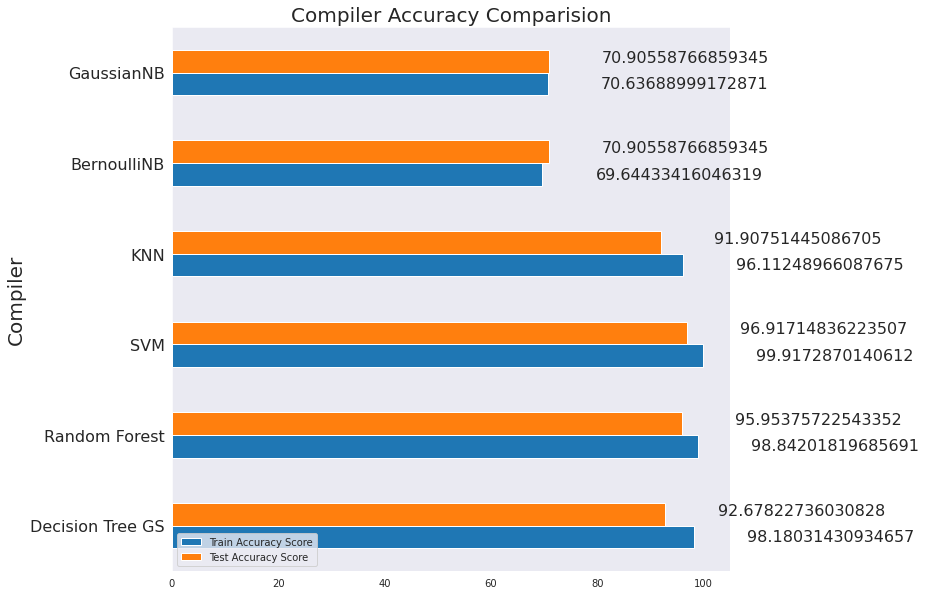

In [ ]:
import seaborn as sns
sns.set_style("dark")
ax = compiler_compare.plot.barh(x='Name', rot=0, figsize=(10, 10))
plt.yticks(size =16)
plt.legend(loc='lower left')
plt.ylabel("Compiler" , size =20)
plt.title("Compiler Accuracy Comparision", size = 20)
for index, value in enumerate(compiler_compare['Test Accuracy Score']):
    plt.text(value+10, index+.12, str(value),size=16)
for index, value in enumerate(compiler_compare['Train Accuracy Score']):
    plt.text(value+10, index-.17, str(value),size=16)

In [ ]:
#!pip install scikit

In [ ]:
import numpy
import pandas
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm



# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
# load dataset
#dataframe = pandas.read_csv(r"../input/car_evaluation.csv")

# Reading Data Set
from google.colab import drive
drive.mount("/content/gdrive")


# Importing the dataset (Link - https://drive.google.com/file/d/1GBP8p2PMLyo4KK_9CjnTF0g0pDiq85_m/view?usp=sharing)
dataframe = pandas.read_csv('/content/gdrive/MyDrive/Dissertation dataset/car_evaluation (version 1).csv', header = 0)


# Assign names to Columns
dataframe.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

# Encode Data
dataframe.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
dataframe.persons.replace(('2','4','more'),(1,2,3), inplace=True)
dataframe.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
dataframe.safety.replace(('low','med','high'),(1,2,3), inplace=True)
dataframe.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [ ]:
print("dataframe.head: ", dataframe.head())

In [ ]:
print("dataframe.head: ", dataframe.head())

In [ ]:
list = []
for i in dataframe.classes:
  if pandas.isna(i):
    continue
  else:
    list.append(i)

In [ ]:
plt.hist((list))

In [ ]:
dataframe.hist()

In [ ]:
dataframe

In [ ]:
dataset = dataframe.values


X = dataset[:,0:6]
Y = numpy.asarray(dataset[:,6], dtype="int64")


In [ ]:
print(X)
print(Y)

In [ ]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

# create model
model = Sequential()
model.add(Dense(25, input_dim=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=600, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
